# Учебный проект 3_Исследование объявлений о продаже квартир

## Содержание

* [Описание проекта](#Описание)
* [Импорт библиотек Python и загрузка данных](#Импорт)
* [Предобработка данных](#Предобработка)
    * [Категоризация данных](#Категоризация)
* [Исследовательский анализ данных](#Исследование)
* [Вывод](#Вывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные сервиса Яндекс Недвижимость — `архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет`. 

**Задача**: `Определить рыночную стоимость объектов недвижимости`.

Путь решения: `Проведение исследовательского анализа данных и установка параметров, влияющих на цену объектов`. В дальнейшем это послужит основой для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. **Первые вписаны пользователем**, **вторые — получены автоматически на основе картографических данных**.

Получены автоматически из геосервисов:
* расстояние до центра;
* расстояние до аэропорта;
* расстояние до других объектов;
* количество парков и водоёмов.

## Импорт библиотек Python и загрузка данных

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменной **data** для хранения загруженного датасета;
3. Вывод на экран параметров датасета:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * перечень столбцов набора данных;
    * общей информации о наборе данных;
4. Вывод по итогам данного этапа.

In [1]:
# импорт библиотек Python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt

In [4]:
# инициализация переменной data - запись набора данных
data = pd.read_csv("~/Desktop/YandexPractikum_projects/datasets/real_estate_data.csv", sep = '\t')

# вывод на экран структуры набора данных
display(data.head())

# вывод на экран перечня всех столбцов датасета
for column in data.columns.to_list():
    print(f'* {column}')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* total_images
* last_price
* total_area
* first_day_exposition
* rooms
* ceiling_height
* floors_total
* living_area
* floor
* is_apartment
* studio
* open_plan
* kitchen_area
* balcony
* locality_name
* airports_nearest
* cityCenters_nearest
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest
* days_exposition


**Описание данных**

* total_images - число фотографий квартиры в объявлении;
* last_price - цена на момент снятия с публикации;
* total_area - общая площадь квартиры, в квадратных метрах;
* first_day_exposition - дата публикации;
* rooms - число комнат;
* ceiling_height - высота потолков, в метрах;
* floors_total - всего этажей в доме;
* living_area - жилая площадь, в квадратных метрах;
* floor - этаж;
* is_apartment - апартаменты (булев тип данных);
* studio - квартира-студия (булев тип данных);
* open_plan - свободная планировка (булев тип данных);
* kitchen_area - площадь кухни, в квадратных метрах;
* balcony - число балконов;
* locality_name - название населенного пункта;
* airports_nearest - расстояние до ближайшего аэропорта, в метрах;
* cityCenters_nearest - расстояние до центра города, в метрах;
* parks_around3000 - число парков в радиусе 3 км;
* parks_nearest - расстояние до ближайшего парка, в метрах;
* ponds_around3000 - число водоемов в радиусе 3 км;
* ponds_nearest - расстояние до ближайшего водоема, в метрах;
* days_exposition - сколько дней было размещено объявление (от публикации до снятия);

In [5]:
# вывод на экран общей информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

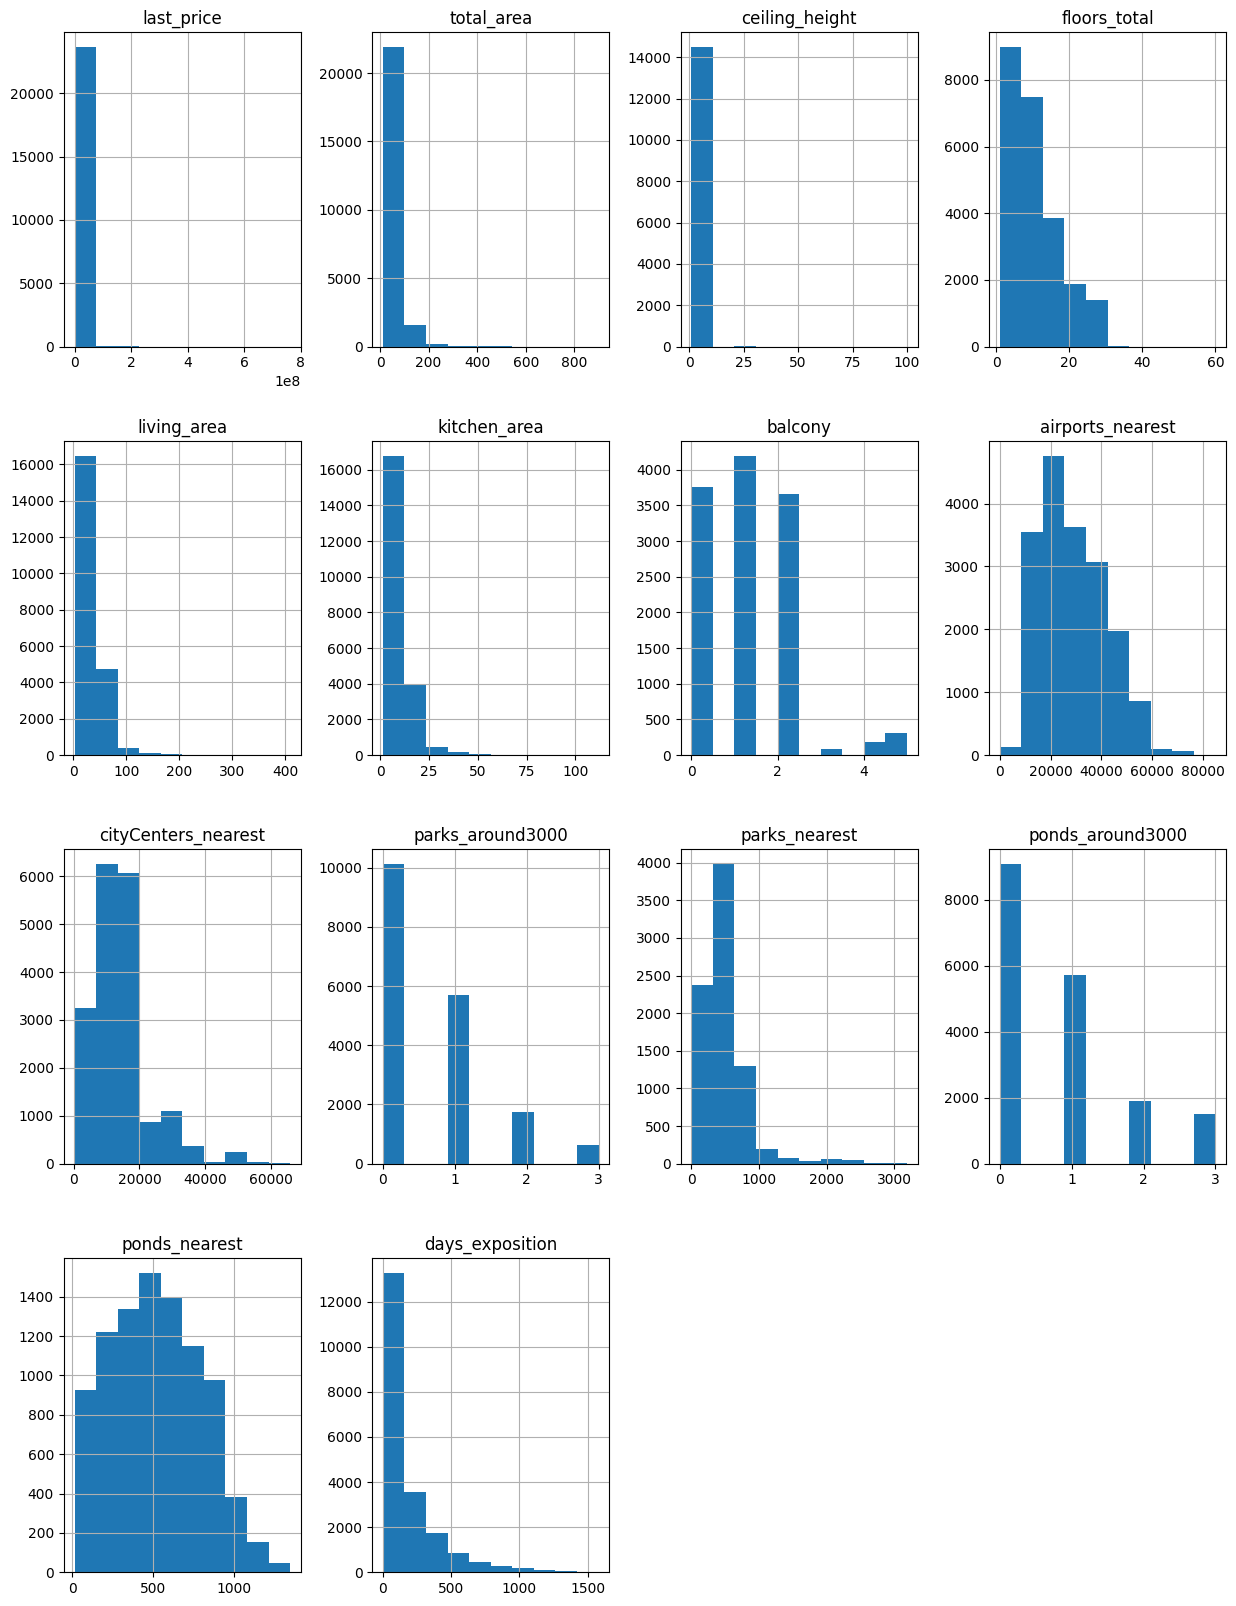

In [11]:
# построение диаграммы для всех числовых столбцов текущего набора данных
# plt.figure(figsize = (15, 20))
(data
 .select_dtypes(include='float64')
 .hist(figsize = (15, 20)))
plt.show()